In [234]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [235]:
md = read_csv(r"Market_Dataset.csv", sep=';')
md

,revenue,sales,price,country,year
0,NaN,3805,26339,United States,2013
1,NaN,3805,26339,United States,2013
2,NaN,3804,26328,United States,2014
3,NaN,3801,26335,United States,2015
4,NaN,3803,:,United States,2016
...,...,...,...,...,...
109,NaN,-,9918,Colombia,2019
110,NaN,537,9910,Colombia,2020
111,NaN,547,-,Colombia,2021
112,NaN,549,:,Colombia,2022


In [236]:
md['country'] = md['country'].str.lower()

In [237]:
# Find missing values
percent_missing = md.isnull().sum() * 100 / len(md)
missing_value_df = pd.DataFrame({'column_name': md.columns,
                                 'percent_missing': percent_missing})
display(missing_value_df)

,column_name,percent_missing
revenue,revenue,100.000000
sales,sales,3.508772
price,price,0.000000
country,country,0.000000
year,year,0.000000


In [238]:
# Count unique values of all categorical columns
categorical_cols = ['revenue', 'sales', 'price', 'country', 'year']
cat_cols_unique_counts_df = pd.DataFrame(columns = ['UniqueValuesCount'], index = categorical_cols)
for col in categorical_cols:
    cat_cols_unique_counts_df.loc[col] = md[col].nunique()
display(cat_cols_unique_counts_df)

,UniqueValuesCount
revenue,0
sales,73
price,80
country,14
year,10


In [239]:
#md['sales'].unique()
md['price'].unique()

array(['26339', '26328', '26335', ':', '26337', '26331', '26326', '26329',
       '31098', '31101', '31090', '31093', '31094', '17799', '17795',
       '17803', '17791', '17797', '.', '17792', '12454', '12459', '12462',
       '12466', '12455', '12460', '12465', '12467', '12463', '14630',
       '14627', '14624', '14631', '14626', 'e', '14632', '13598', '13607',
       '13602', '13606', '13604', '13600', '13601', '13609', '11752',
       '11756', '11753', '11757', '11758', '11762', '-', '11759', '12490',
       '12485', '12487', '12492', '12482', '12491', '12484', '9046',
       '9048', '9047', '9053', '9049', '9041', '9045', '16228', '16230',
       '16227', '16239', '16238', '16229', '16237', '9917', '9920',
       '9914', '9911', '9913', '9918', '9910'], dtype=object)

In [240]:
md.replace(':', np.nan, inplace = True)
md.replace('-', np.nan, inplace = True)
md.replace('.', np.nan, inplace = True)
md.replace('e', np.nan, inplace = True)

In [241]:
md['sales'].unique()

array(['3805', '3804', '3801', '3803', '3802', nan, '3809', '3807',
       '1223', '1231', '1227', '1234', '1232', '1230', '1228', '0',
       '2927', '2926', '2936', '2934', '2929', '2935', '2924', '2925',
       '6785', '6791', '6786', '6796', '6795', '6793', '6792', '615',
       '617', '616', '618', '609', '614', '5068', '5071', '5069', '5065',
       '5075', '5078', '5073', '1166', '1162', '1172', '1167', '1169',
       '1170', '1165', '2120', '2126', '2118', '2122', '2121', '2116',
       '1517', '1514', '1515', '1511', '1513', '1520', '1518', '1519',
       '544', '547', '541', '549', '537'], dtype=object)

In [242]:
md.drop_duplicates(subset=None, keep='first', inplace=True)

In [243]:
display(md)

,revenue,sales,price,country,year
0,NaN,3805,26339,united states,2013
2,NaN,3804,26328,united states,2014
3,NaN,3801,26335,united states,2015
4,NaN,3803,NaN,united states,2016
5,NaN,3802,26337,united states,2017
...,...,...,...,...,...
108,NaN,549,9913,colombia,2018
109,NaN,NaN,9918,colombia,2019
110,NaN,537,9910,colombia,2020
111,NaN,547,NaN,colombia,2021


In [244]:
md = md.sort_values(by=['year'])
md

,revenue,sales,price,country,year
0,NaN,3805,26339,united states,2013
51,NaN,615,13598,ghana,2013
71,NaN,1166,12490,brazil,2013
41,NaN,6785,14630,china,2013
81,NaN,2120,9046,france,2013
...,...,...,...,...,...
80,NaN,1165,12484,brazil,2022
30,NaN,2924,17792,united kingdom,2022
60,NaN,616,13609,ghana,2022
10,NaN,3807,26329,united states,2022


In [245]:
md.insert(loc=0, column='row_num', value=np.arange(len(md)))
md

,row_num,revenue,sales,price,country,year
0,0,NaN,3805,26339,united states,2013
51,1,NaN,615,13598,ghana,2013
71,2,NaN,1166,12490,brazil,2013
41,3,NaN,6785,14630,china,2013
81,4,NaN,2120,9046,france,2013
...,...,...,...,...,...,...
80,106,NaN,1165,12484,brazil,2022
30,107,NaN,2924,17792,united kingdom,2022
60,108,NaN,616,13609,ghana,2022
10,109,NaN,3807,26329,united states,2022


In [246]:
md.head(20)

,row_num,revenue,sales,price,country,year
0,0,NaN,3805,26339,united states,2013
51,1,NaN,615,13598,ghana,2013
71,2,NaN,1166,12490,brazil,2013
41,3,NaN,6785,14630,china,2013
81,4,NaN,2120,9046,france,2013
91,5,NaN,1517,16228,italy,2013
21,6,NaN,0,17799,united kingdom,2013
103,7,NaN,544,9917,colombia,2013
11,8,NaN,1223,31098,germany,2013
31,9,NaN,NaN,12454,united kingdom,2013


In [254]:
md['country'] = md['country'].str.replace('brazii','brazil')

In [255]:
md['country'] = md['country'].str.replace('col0mbia','colombia')

In [256]:
md['price'] = md['price'].astype(float).interpolate()

In [257]:
md['sales'] = md['sales'].astype(float).interpolate()

In [258]:
md.head()

,row_num,revenue,sales,price,country,year
0,0,100219895.0,3805.0,26339.0,united states,2013
51,1,8362770.0,615.0,13598.0,ghana,2013
71,2,14563340.0,1166.0,12490.0,brazil,2013
41,3,99264550.0,6785.0,14630.0,china,2013
81,4,19177520.0,2120.0,9046.0,france,2013


In [259]:
md.dtypes

row_num      int64
revenue    float64
sales      float64
price      float64
country     object
year         int64
dtype: object

In [260]:
md['revenue'] = md['sales'] * md['price']

<Figure size 1440x1440 with 0 Axes>

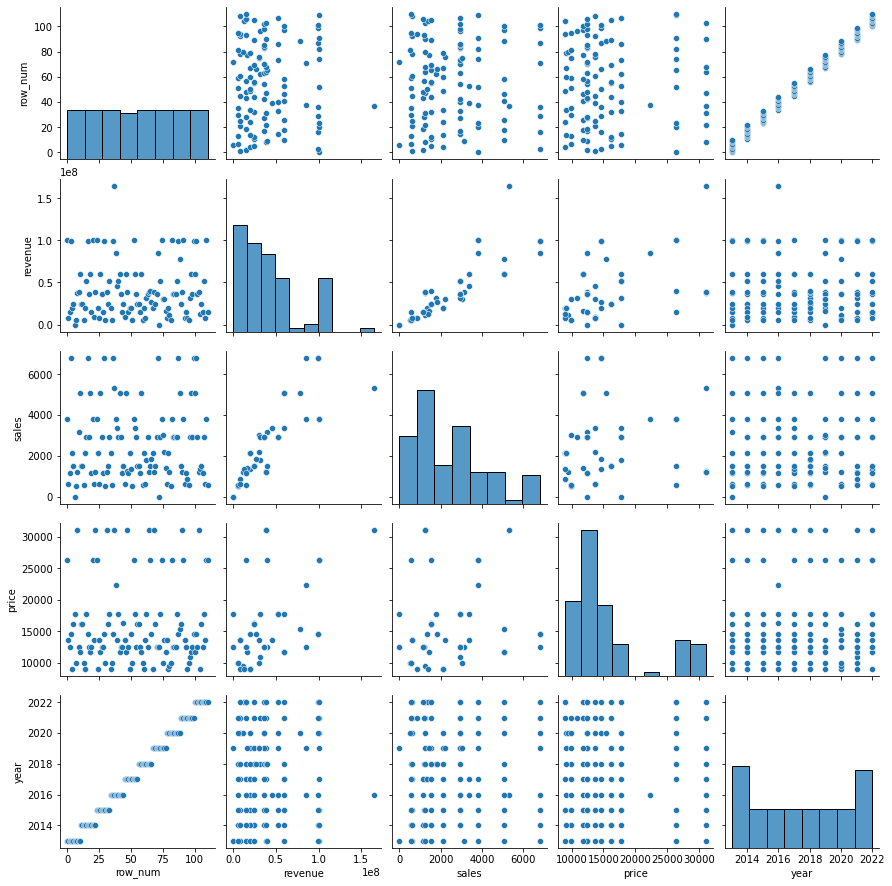

In [261]:
plt.figure(figsize=(20, 20))
sns.pairplot(md)
plt.show()

In [262]:
md['country'].unique()

array(['united states', 'ghana', 'brazil', 'china', 'france', 'italy',
       'united kingdom', 'colombia', 'germany', 'australia', 'itaiy',
       'austraiia'], dtype=object)

In [226]:
#md = md[md['country'].str.contains('brazii')==False]

In [227]:
#md = md[md['country'].str.contains('col0mbia')==False]

In [228]:
#md['country'].unique()

array(['united states', 'ghana', 'brazil', 'china', 'france', 'italy',
       'united kingdom', 'colombia', 'germany', 'australia', 'itaiy',
       'austraiia'], dtype=object)

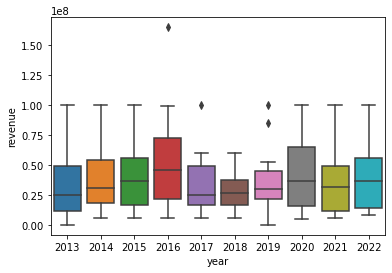

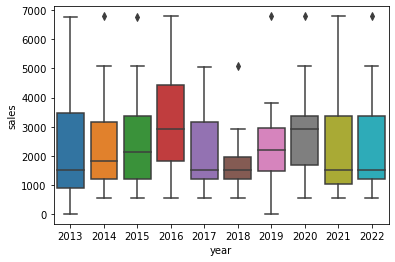

In [263]:
sns.boxplot( y=md['revenue'], x=md['year']);
plt.show()
sns.boxplot( y=md['sales'], x=md['year'] );
plt.show()

In [230]:
md.head()

,row_num,revenue,sales,price,country,year
0,0,100219895.0,3805.0,26339.0,united states,2013
51,1,8362770.0,615.0,13598.0,ghana,2013
71,2,14563340.0,1166.0,12490.0,brazil,2013
41,3,99264550.0,6785.0,14630.0,china,2013
81,4,19177520.0,2120.0,9046.0,france,2013


In [264]:
print(md['revenue'])

0      100219895.0
51       8362770.0
71      14563340.0
41      99264550.0
81      19177520.0
          ...     
80      14543860.0
30      52023808.0
60       8383144.0
10     100234503.0
112     14454621.0
Name: revenue, Length: 111, dtype: float64


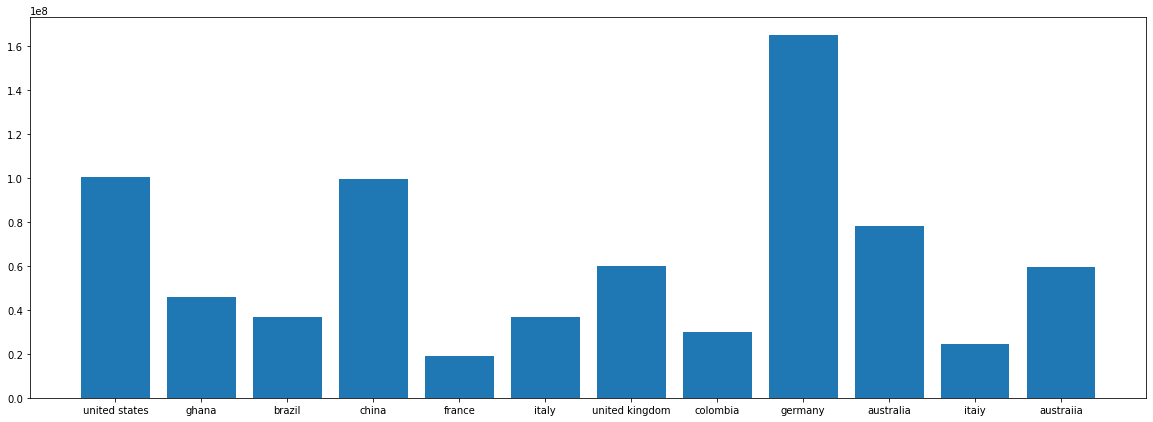

In [265]:
plt.figure(figsize=(20, 7))
plt.bar(md.country, md.revenue)
plt.show()

In [233]:
md.to_csv(r"marketdata47.csv", index = False)